# Decision Trees and Ensemble Learning

Hi, I'm Norman! These are my notes from Module 6 of the ML ZoomCamp.

Let’s connect on [LinkedIn](https://www.linkedin.com/in/anormanangel/) and [Twitter](https://x.com/anormanangel) to keep learning together.

## 6.1 Credit Risk Scoring

- Dataset: https://github.com/gastonstat/CreditScoring

In [64]:
# Importing necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data cleaning and preparation
- Downloading the dataset
- Re-encoding the categorical variables
- Doing the train/validation/test split

In [65]:
# Load the dataset

df = pd.read_csv('https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv')

df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [66]:
# Clean the column names

df.columns = df.columns.str.lower()

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [67]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

In [68]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [69]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [70]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [71]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [72]:
# Replacing 99999999 with missing (NaN)

for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan).max()

In [73]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [74]:
# Filter out 'unk' status
df = df[df.status != 'unk'].reset_index(drop=True)


In [75]:
# Train, validate & test split

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11) 

In [76]:
df_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
951,default,10,owner,36,36,married,no,freelance,75,959.0,300000.0,30000.0,1000,1400
688,default,6,parents,48,32,single,yes,fixed,35,959.0,300000.0,30000.0,1100,1330
2233,ok,1,parents,48,40,married,no,fixed,75,959.0,300000.0,30000.0,1320,1600
3304,default,1,parents,48,23,single,no,partime,35,959.0,300000.0,30000.0,1078,1079
2271,ok,5,owner,36,46,married,no,freelance,60,959.0,300000.0,30000.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,ok,18,private,36,45,married,no,fixed,45,959.0,300000.0,30000.0,800,1600
1784,ok,7,private,60,29,married,no,fixed,60,959.0,300000.0,30000.0,1000,1290
808,ok,1,parents,24,19,single,no,fixed,35,959.0,300000.0,30000.0,400,600
1857,ok,15,owner,48,43,married,no,freelance,60,959.0,300000.0,30000.0,2500,2976


In [77]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [78]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [79]:
del df_train['status']
del df_val['status']
del df_test['status']

In [80]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,959.0,300000.0,30000.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,959.0,300000.0,30000.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,959.0,300000.0,30000.0,1320,1600
3,1,parents,48,23,single,no,partime,35,959.0,300000.0,30000.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,959.0,300000.0,30000.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,959.0,300000.0,30000.0,800,1600
2668,7,private,60,29,married,no,fixed,60,959.0,300000.0,30000.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,959.0,300000.0,30000.0,400,600
2670,15,owner,48,43,married,no,freelance,60,959.0,300000.0,30000.0,2500,2976


## 6.3 Decision Trees 

- How a decsion tree looks like
- Training a decision tree
- Overfitting
- Controling then size of the tree

In [81]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [82]:
xi = df_train.iloc[0].to_dict()

In [83]:
assess_risk(xi)

'ok'

In [84]:
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 959.0,
 'assets': 300000.0,
 'debt': 30000.0,
 'amount': 1000,
 'price': 1400}

In [85]:
# Importing necessary libraries for modeling

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score


In [86]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,959.0,300000.0,30000.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,959.0,300000.0,30000.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,959.0,300000.0,30000.0,1320,1600
3,1,parents,48,23,single,no,partime,35,959.0,300000.0,30000.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,959.0,300000.0,30000.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,959.0,300000.0,30000.0,800,1600
2668,7,private,60,29,married,no,fixed,60,959.0,300000.0,30000.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,959.0,300000.0,30000.0,400,600
2670,15,owner,48,43,married,no,freelance,60,959.0,300000.0,30000.0,2500,2976


In [87]:
# Convert training data to dictionary format

train_dicts = df_train.fillna(0).to_dict(orient='records')

In [88]:
# Train the dictionary vectorizer

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [89]:
# Train the decision tree model

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [90]:
# Convert validation data to dictionary format

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [91]:
# Evaluate the model on validation set

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.628793199486571

In [92]:
# Evaluate the model on training set

y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [93]:
# Retrain the model controlling the tree depth to control overfitting

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [94]:
# Evaluate the model on training set
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

# Evaluate the model on validation set
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [95]:
from sklearn.tree import export_text

In [96]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



## Decision Tree Learning Algorithm

- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [97]:
# Sample data for testing the assess_risk function
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

# Create a DataFrame from the sample data

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example



,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [98]:
# Sort values by assets

df_example.sort_values(by='assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [99]:
# Create a list of threshold values

Ts = [0, 2000, 3000, 4000, 5000, 8000,]

In [100]:
from IPython.display import display

In [101]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_right.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64


In [102]:
# With 2 Features

# Sample data for testing the assess_risk function
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example



,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [103]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [104]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [105]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


## 6.5 Decision Trees Parameter Tuning

- selecting max_depth
- selecting min_samples_leaf

In [106]:
# Hyperparameter tuning for max_depth

depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('depth=%2s -> %.3f' % (depth, auc))

depth= 1 -> 0.606
depth= 2 -> 0.669
depth= 3 -> 0.713
depth= 4 -> 0.719
depth= 5 -> 0.738
depth= 6 -> 0.747
depth=10 -> 0.667
depth=15 -> 0.648
depth=20 -> 0.641
depth=None -> 0.641


In [113]:
# Hyperparameter tuning for max_depth and min_samples_leaf
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [114]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


In [115]:
# Pivoting the DataFrame for better visualization

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)



auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.719  0.738  0.747
5                 0.719  0.737  0.744
10                0.719  0.735  0.742
15                0.717  0.729  0.740
20                0.718  0.732  0.747
100               0.726  0.734  0.747
200               0.725  0.735  0.743
500               0.674  0.674  0.674

<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

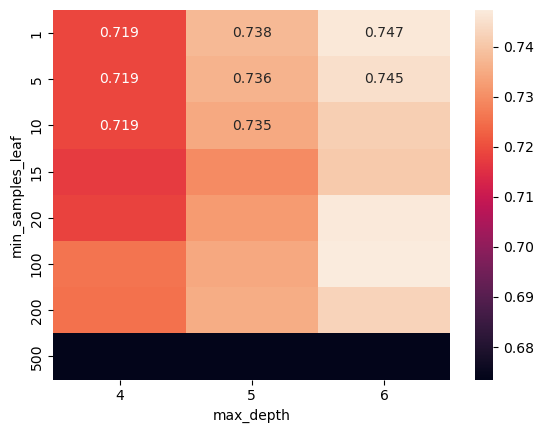

In [110]:
# Plotting the heatmap

sns.heatmap(df_scores_pivot.xs('auc', axis=1), annot=True, fmt='.3f')

In [116]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [112]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- seniority <= 5.50
|   |   |   |--- amount <= 1330.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |--- home=owner <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- home=owner >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- amount >  1330.00
|   |   |   |   |--- home=owner <= 0.50
|   |   |   |   |   |--- price <= 1519.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- price >  1519.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- home=owner >  0.50
|   |   |   |   |   |--- seniority <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- seniority >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- seniority >  5.50
|   |   

## 6.6 Ensembles and random forest
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest